In [2]:
#from google.colab import files
#uploaded = files.upload()

Saving heart_disease_combined.csv to heart_disease_combined.csv


In [3]:
#importing required libraries for data pre-processing.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing the required libraries to perform the ML regression for Serum cholestoral.
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

#importing the required libraries to perform the KNN imnputation.
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [4]:
#loading the final dataset into the dataframe.

heart_data = pd.read_csv("heart_disease_combined.csv")
display(heart_data.head(20))

,age,gender,chest_pain,resting_BP,serum_cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [5]:
#checking the info of the final dataset.

heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  720 non-null    float64
 1   gender               720 non-null    float64
 2   chest_pain           720 non-null    float64
 3   resting_BP           717 non-null    float64
 4   serum_cholestoral    697 non-null    float64
 5   fasting_blood_sugar  637 non-null    float64
 6   resting_ecg          718 non-null    float64
 7   max_heart_rate       718 non-null    float64
 8   exercise_angina      718 non-null    float64
 9   oldpeak              714 non-null    float64
 10  slope                513 non-null    float64
 11  num_major_vessels    307 non-null    float64
 12  thal                 400 non-null    float64
 13  target               720 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 78.9 KB


In [6]:
#checking the distribution of the dataset.

heart_data.describe()

,age,gender,chest_pain,resting_BP,serum_cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thal,target
count,720.000000,720.000000,720.000000,717.000000,697.000000,637.000000,718.000000,718.000000,718.000000,714.000000,513.000000,307.000000,400.000000,720.000000
mean,51.888889,0.738889,3.179167,131.804742,204.774749,0.109890,0.568245,140.565460,0.337047,0.789636,1.701754,0.680782,4.985000,0.850000
std,9.193720,0.439546,0.953646,18.529331,109.275156,0.312999,0.833534,25.647172,0.473031,1.066961,0.585249,0.937101,1.929789,1.076878
min,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,45.000000,0.000000,2.000000,120.000000,182.000000,0.000000,0.000000,122.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,53.000000,1.000000,4.000000,130.000000,227.000000,0.000000,0.000000,142.000000,0.000000,0.200000,2.000000,0.000000,6.000000,0.500000
75%,58.000000,1.000000,4.000000,140.000000,270.000000,0.000000,1.000000,160.000000,1.000000,1.500000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
#checking for NULL values.

heart_data.isnull().sum()

,0
age,0
gender,0
chest_pain,0
resting_BP,3
serum_cholestoral,23
fasting_blood_sugar,83
resting_ecg,2
max_heart_rate,2
exercise_angina,2
oldpeak,6


# **Handling NULL values**.


# **1. Resting BP, Resting ECG, Max Heart Rate, Exercise Angina, Old Peak**

In [8]:
#columns to fill NaN values with Mean values.
columns_to_fill = ['resting_BP ', 'serum_cholestoral', 'resting_ecg', 'max_heart_rate','exercise_angina','oldpeak']

#using a for loop to fill NaN values with mean value.
for column in columns_to_fill:
    heart_data[column].fillna(heart_data[column].mean(), inplace=True)

/tmp/ipython-input-1331366436.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart_data[column].fillna(heart_data[column].mean(), inplace=True)


In [9]:
#re-checking if the NULL values are replaced with Mean values or not.
heart_data.isnull().sum()

,0
age,0
gender,0
chest_pain,0
resting_BP,0
serum_cholestoral,0
fasting_blood_sugar,83
resting_ecg,0
max_heart_rate,0
exercise_angina,0
oldpeak,0


# **2. SERUM CHOLESTORAL**

In [10]:
#checking for the number of records that have serum_cholestoral as 0.
print(heart_data['serum_cholestoral'].value_counts()[0])

123


***Interpretation***

1.   We got 123 records with 0 value.
2.   Technically the serum cholestoral cannot be 0.
3.   Instead of filling these values with mean or median, we shall use Machine learnign Regression technique to predict these values.
4.   This will allow us to input closer values to these reords.



In [11]:
#splitting the data with serum_cholestoral with/without 0 values.

train_data = heart_data[heart_data['serum_cholestoral'] != 0]
predict_data = heart_data[heart_data['serum_cholestoral'] == 0]

In [12]:
#splitting the train data by considering age, resting_BP and max_heart_rate attributes into consideration.
X = train_data[['age','resting_BP ','max_heart_rate']]
y = train_data['serum_cholestoral']

In [13]:
#splitting the test/train data with 80/20 split.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#standardadizing the values.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [15]:
# Train Neural Network (MLPRegressor)
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32),
                         activation='relu',
                         solver='adam',
                         learning_rate_init=0.001,
                         max_iter=1000,
                         early_stopping=True,
                         random_state=42)

In [16]:
mlp_model.fit(X_train_scaled, y_train)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(64, 32), max_iter=1000,
             random_state=42)

In [17]:
# Predict on validation
y_pred_val = mlp_model.predict(X_val_scaled)

In [18]:
# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
mae = mean_absolute_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

In [19]:
print("\n===== Evaluation Results =====")
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation MAE : {mae:.2f}")
print(f"Validation R² Score: {r2:.2f}")


===== Evaluation Results =====
Validation RMSE: 55.43
Validation MAE : 42.67
Validation R² Score: -0.12


In [20]:
# Predict missing serumcholestrol values
X_predict_scaled = scaler.transform(predict_data[['age', 'resting_BP ', 'max_heart_rate']])
predicted_cholestrol = mlp_model.predict(X_predict_scaled)


In [21]:
print("\n===== Predicted serumcholestrol values for 0 entries =====")
print(predicted_cholestrol)


===== Predicted serumcholestrol values for 0 entries =====
[296.39732124 243.83169119 256.70800778 268.0863171  238.63730487
 235.75175187 249.49620785 254.07033175 230.92810468 259.85448809
 249.17916332 231.7451354  249.13612535 272.00358965 258.63024494
 226.40787289 232.5364559  228.90637894 237.8246016  256.45769344
 245.56535284 238.70426749 225.90772705 240.85663682 232.96356431
 248.91338082 241.47203284 227.0825921  230.9594346  235.81270796
 290.60693895 261.52559267 234.9418284  231.29218983 334.83201608
 243.87972188 236.79892835 233.940806   249.4350115  316.10666731
 272.66947996 236.76320633 250.82943675 243.40374615 240.9005675
 238.84775263 235.67589847 262.06940378 235.80024061 241.17778242
 277.3407123  233.04386477 239.66436408 275.80744778 280.18191862
 265.53775745 258.7761462  258.33866475 298.0778206  260.33221069
 239.13963449 250.19428096 237.46013067 244.72663031 238.92302009
 239.05890385 249.99699116 265.77317877 293.73082676 241.83560211
 251.10854873 273

In [22]:
# Round the predicted values (remove decimals)
predicted_cholestrol_rounded = np.round(predicted_cholestrol).astype(int)
print(predicted_cholestrol_rounded)

[296 244 257 268 239 236 249 254 231 260 249 232 249 272 259 226 233 229
 238 256 246 239 226 241 233 249 241 227 231 236 291 262 235 231 335 244
 237 234 249 316 273 237 251 243 241 239 236 262 236 241 277 233 240 276
 280 266 259 258 298 260 239 250 237 245 239 239 250 266 294 242 251 273
 269 279 244 240 242 248 245 238 324 270 257 355 262 255 251 243 294 258
 251 259 243 245 244 305 247 313 289 269 248 278 258 313 347 279 258 276
 315 271 269 284 265 258 257 263 258 263 285 285 294 298 283]


In [23]:
# Impute the predicted serumcholestrol values
heart_data.loc[heart_data['serum_cholestoral'] == 0, 'serum_cholestoral'] = predicted_cholestrol_rounded

In [24]:
#checking the distribution of the dataset once we have used regression to impute the serum_cholestoral values.
heart_data.describe()

,age,gender,chest_pain,resting_BP,serum_cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thal,target
count,720.000000,720.000000,720.000000,720.000000,720.000000,637.000000,720.000000,720.000000,720.000000,720.000000,513.000000,307.000000,400.000000,720.000000
mean,51.888889,0.738889,3.179167,131.804742,249.156693,0.109890,0.568245,140.565460,0.337047,0.789636,1.701754,0.680782,4.985000,0.850000
std,9.193720,0.439546,0.953646,18.490635,55.173811,0.312999,0.832373,25.611477,0.472372,1.062500,0.585249,0.937101,1.929789,1.076878
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,45.000000,0.000000,2.000000,120.000000,212.750000,0.000000,0.000000,122.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,53.000000,1.000000,4.000000,130.000000,244.000000,0.000000,0.000000,142.000000,0.000000,0.200000,2.000000,0.000000,6.000000,0.500000
75%,58.000000,1.000000,4.000000,140.000000,275.250000,0.000000,1.000000,160.000000,1.000000,1.500000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [25]:
#re-checking the NULL values.
heart_data.isnull().sum()

,0
age,0
gender,0
chest_pain,0
resting_BP,0
serum_cholestoral,0
fasting_blood_sugar,83
resting_ecg,0
max_heart_rate,0
exercise_angina,0
oldpeak,0


# **Handling NULL values for the below mentioned columns.**

*  Slope
*  fasting_blood_sugar
*  num_major_vessels
*  Thal



In [26]:
#checking the values of the slope: Proceeding to delete the 0 values for the slope.
#heart_data['slope'].value_counts().sort_index()

# **KNN IMPUTATION**

In [27]:
# Columns for KNN imputation (categorical + fasting_blood_sugar)
categorical_cols = ['slope', 'num_major_vessels', 'thal', 'fasting_blood_sugar']

In [28]:
#Encoding the categorical columns for KNN imputation (Leaving the fasting_blood_sugar column as it is, since it is numerical column.)

label_encoders = {}
for col in categorical_cols:
  if heart_data[col].dtype == 'object' or str(heart_data[col].dtype) == 'category':
    le = LabelEncoder()
    heart_data[col] = heart_data[col].astype(str)
    heart_data[col] = le.fit_transform(heart_data[col])
    label_encoders[col] = le

In [29]:
# Apply KNN Imputer on the selected columns
knn_imputer = KNNImputer(n_neighbors=5)
heart_data[categorical_cols] = knn_imputer.fit_transform(heart_data[categorical_cols])

In [30]:
# Decode encoded columns back to original labels (only for those that were encoded)
for col, le in label_encoders.items():
  heart_data[col] = heart_data[col].round().astype(int) # ensure valid integer labels
  heart_data[col] = le.inverse_transform(heart_data[col])


print("Missing values after KNN imputation:\n", heart_data[categorical_cols].isnull().sum())

Missing values after KNN imputation:
 slope                  0
num_major_vessels      0
thal                   0
fasting_blood_sugar    0
dtype: int64


In [31]:
#final re-checking the NULL values.
heart_data.isnull().sum()

,0
age,0
gender,0
chest_pain,0
resting_BP,0
serum_cholestoral,0
fasting_blood_sugar,0
resting_ecg,0
max_heart_rate,0
exercise_angina,0
oldpeak,0


In [32]:
#calculating the correlation between the features.

correlation_matrix = heart_data.corr()
correlation_matrix

,age,gender,chest_pain,resting_BP,serum_cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thal,target
age,1.000000,-0.026807,0.159796,0.251097,0.156559,0.159244,0.233167,-0.333341,0.138140,0.221836,0.052961,0.353686,0.172641,0.285736
gender,-0.026807,1.000000,0.154897,-0.009157,-0.055398,0.042262,-0.046263,-0.145570,0.154254,0.068352,0.068985,0.088278,0.283347,0.237417
chest_pain,0.159796,0.154897,1.000000,0.005205,0.116609,0.009420,0.015994,-0.340466,0.421501,0.242098,0.138890,0.261931,0.331222,0.436561
resting_BP,0.251097,-0.009157,0.005205,1.000000,0.111716,0.095955,0.095189,-0.116188,0.129944,0.165499,0.032813,0.118929,0.088087,0.101721
serum_cholestoral,0.156559,-0.055398,0.116609,0.111716,1.000000,0.055943,0.084910,-0.129931,0.114450,0.060639,0.029237,0.127536,0.053081,0.121676
fasting_blood_sugar,0.159244,0.042262,0.009420,0.095955,0.055943,1.000000,0.098964,0.018136,0.036725,0.062126,0.039001,0.199675,0.076619,0.094135
resting_ecg,0.233167,-0.046263,0.015994,0.095189,0.084910,0.098964,1.000000,0.082755,0.034579,0.148477,-0.027075,0.168800,-0.008392,0.165047
max_heart_rate,-0.333341,-0.145570,-0.340466,-0.116188,-0.129931,0.018136,0.082755,1.000000,-0.357512,-0.155526,-0.299489,-0.235303,-0.294972,-0.368545
exercise_angina,0.138140,0.154254,0.421501,0.129944,0.114450,0.036725,0.034579,-0.357512,1.000000,0.373507,0.234637,0.271379,0.390516,0.360190
oldpeak,0.221836,0.068352,0.242098,0.165499,0.060639,0.062126,0.148477,-0.155526,0.373507,1.000000,0.309830,0.374319,0.358984,0.402942


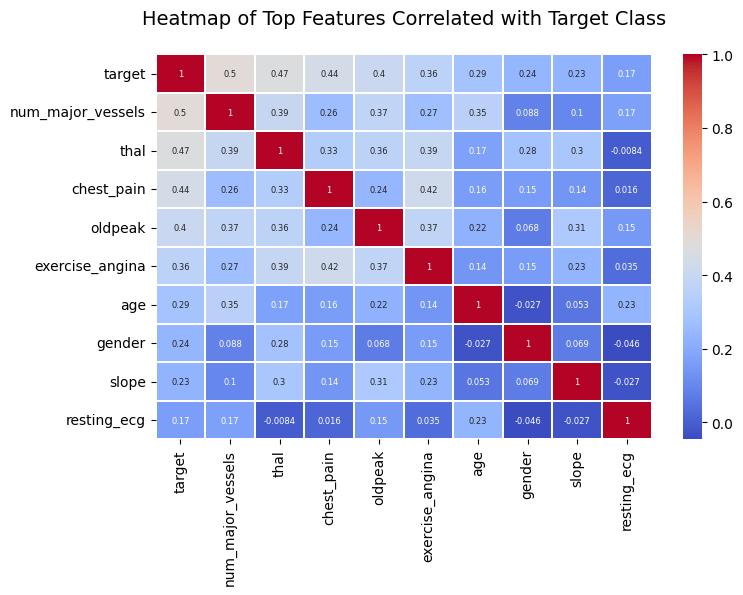

In [33]:
#plotting a heat map with top correlated features.
top_features = correlation_matrix['target'].sort_values(ascending=False)[:10].index
plt.figure(figsize=(8, 5))
sns.heatmap(heart_data[top_features].corr(), annot=True, cmap='coolwarm', linewidths=0.1, annot_kws={"fontsize": 6})
plt.title('Heatmap of Top Features Correlated with Target Class\n', fontsize=14)
plt.show()

In [34]:
#saving the pre-processed dataset into a csv file.
heart_data.to_csv("preprocessed_dataset.csv", index=False)